In [1]:
import pandas as pd

df_partidos = pd.read_csv("../partidos_cebollitas_fe82a1a4-e109-41b1-8b78-d9b4341dacaf.csv")
# df_partidos_cebollitas = df_partidos[(df_partidos['equipo_local'] == 'Cebollitas FC') | (df_partidos['equipo_visitante'] == 'Cebollitas FC')]
df_partidos_cebollitas = df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC']
df_partidos_cebollitas.reset_index(drop=True, inplace=True)
df_partidos = df_partidos_cebollitas.copy()
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos['ratio_tiros_posesion_local'] = df_partidos['tiros_arco_local'] / (df_partidos['posesion_local (%)'])
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local
0,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
1,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML,-1,0.089286
2,2023-03-19,Cebollitas FC,Data United,4,0,49,51,4,12,Estadio DataCamp,4,0.081633
3,2023-05-21,Cebollitas FC,Real Pandas,0,1,47,53,11,5,Estadio ML,-1,0.234043
4,2023-05-28,Cebollitas FC,Real Pandas,3,3,53,47,7,4,Python Arena,0,0.132075


In [2]:
from sklearn.feature_selection import SelectKBest, f_regression

# Variables predictoras y objetivo
X = df_partidos[['posesion_local (%)', 'tiros_arco_local', 'ratio_tiros_posesion_local']]
y = df_partidos['goles_local']

# Seleccionar las 2 mejores variables
selector = SelectKBest(score_func=f_regression, k=2)
X_new = selector.fit_transform(X, y)

# Resultados ordenados por relevancia
scores = selector.scores_
variables = X.columns

resultados = pd.DataFrame({'Variable': variables, 'Score': scores}).sort_values(by='Score', ascending=False)
resultados

,Variable,Score
1,tiros_arco_local,2.183763
2,ratio_tiros_posesion_local,1.932511
0,posesion_local (%),0.081116


In [3]:
from sklearn.tree import DecisionTreeRegressor

# Entrenar el arbol de decisión para medir la importancia de las características
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X, y)

# Importancia calculada por el modelo
importancia = modelo_arbol.feature_importances_

resultado_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancia}).sort_values(by='Importancia', ascending=False)
resultado_importancia

,Variable,Importancia
0,posesion_local (%),0.469859
2,ratio_tiros_posesion_local,0.341213
1,tiros_arco_local,0.188929


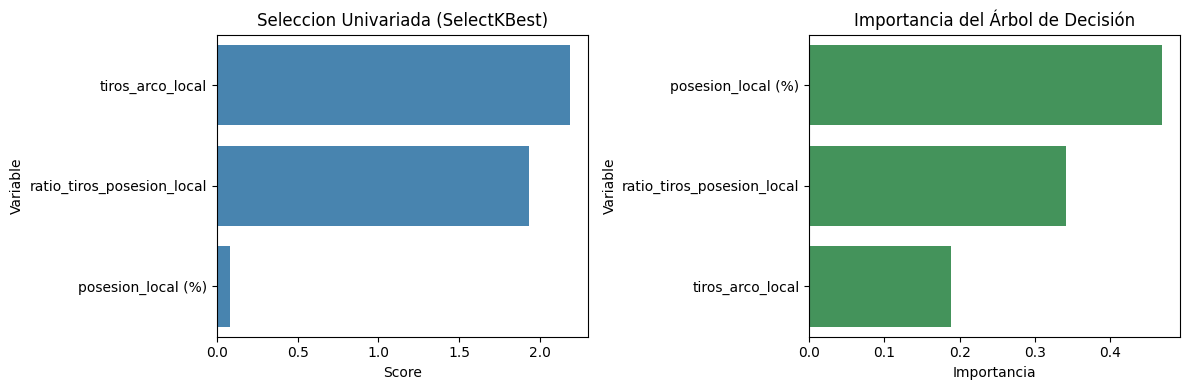

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Gráfica SelectKBest (análisis univariado)
sns.barplot(x='Score', y='Variable', data=resultados, ax=ax[0], palette='Blues_d', hue=False, legend=False)
ax[0].set_title('Seleccion Univariada (SelectKBest)')

# Gráfica Importancia del Árbol de Decisión
sns.barplot(x='Importancia', y='Variable', data=resultado_importancia, ax=ax[1], palette='Greens_d', hue=False, legend=False)
ax[1].set_title('Importancia del Árbol de Decisión')
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

df_partidos = pd.read_csv("../partidos_cebollitas_fe82a1a4-e109-41b1-8b78-d9b4341dacaf.csv")
# df_partidos_cebollitas = df_partidos[(df_partidos['equipo_local'] == 'Cebollitas FC') | (df_partidos['equipo_visitante'] == 'Cebollitas FC')]
df_partidos_cebollitas = df_partidos[df_partidos['equipo_visitante'] == 'Cebollitas FC']
df_partidos_cebollitas.reset_index(drop=True, inplace=True)
df_partidos = df_partidos_cebollitas.copy()
df_partidos['diferencia_goles'] = df_partidos['goles_visitante'] - df_partidos['goles_local']
df_partidos['ratio_tiros_posesion_visitante'] = df_partidos['tiros_arco_visitante'] / (df_partidos['posesion_visitante (%)'])
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_visitante
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,-2,0.130435
1,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,-2,0.250000
2,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena,0,0.275000
3,2023-03-05,Atlético Python,Cebollitas FC,1,4,43,57,10,7,Estadio ML,3,0.122807
4,2023-07-09,Atlético Python,Cebollitas FC,4,4,53,47,8,12,Estadio ML,0,0.255319


In [6]:
from sklearn.feature_selection import SelectKBest, f_regression

# Variables predictoras y objetivo
X = df_partidos[['posesion_visitante (%)', 'tiros_arco_visitante', 'ratio_tiros_posesion_visitante']]
y = df_partidos['goles_visitante']

# Seleccionar las 2 mejores variables
selector = SelectKBest(score_func=f_regression, k=2)
X_new = selector.fit_transform(X, y)

# Resultados ordenados por relevancia
scores = selector.scores_
variables = X.columns

resultados = pd.DataFrame({'Variable': variables, 'Score': scores}).sort_values(by='Score', ascending=False)
resultados

,Variable,Score
0,posesion_visitante (%),0.401646
1,tiros_arco_visitante,0.039700
2,ratio_tiros_posesion_visitante,0.001028


In [7]:
from sklearn.tree import DecisionTreeRegressor

# Entrenar el arbol de decisión para medir la importancia de las características
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X, y)

# Importancia calculada por el modelo
importancia = modelo_arbol.feature_importances_

resultado_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancia}).sort_values(by='Importancia', ascending=False)
resultado_importancia

,Variable,Importancia
2,ratio_tiros_posesion_visitante,0.645271
0,posesion_visitante (%),0.217003
1,tiros_arco_visitante,0.137726


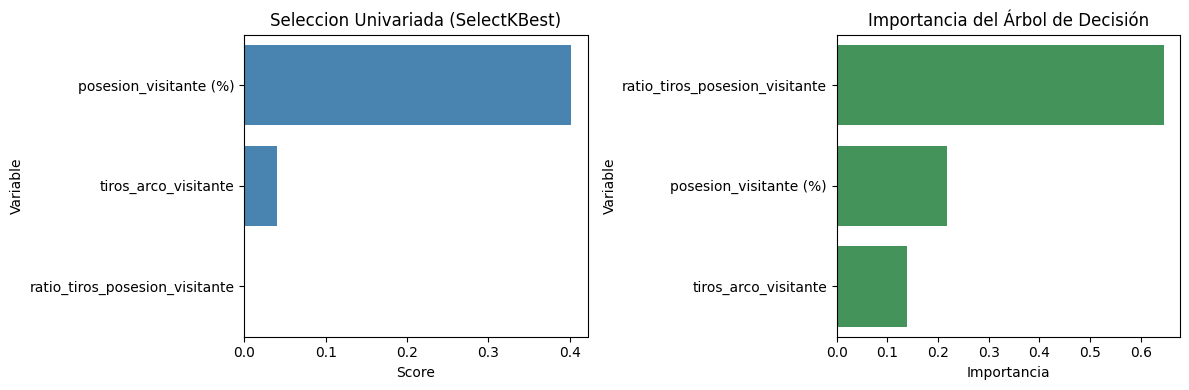

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Gráfica SelectKBest (análisis univariado)
sns.barplot(x='Score', y='Variable', data=resultados, ax=ax[0], palette='Blues_d', hue=False, legend=False)
ax[0].set_title('Seleccion Univariada (SelectKBest)')

# Gráfica Importancia del Árbol de Decisión
sns.barplot(x='Importancia', y='Variable', data=resultado_importancia, ax=ax[1], palette='Greens_d', hue=False, legend=False)
ax[1].set_title('Importancia del Árbol de Decisión')
plt.tight_layout()
plt.show()